# 1. Non-parametric statistics (AKA Distribution Free)

We evaluated some non-parametric estimations in previous sections while looking at descriptive statistics (Histograms, Kernel density plots). The advantage of non-paramatric statistics is that they are distribution free or at least the distribution parameters are unspecified.

### What to do when your data has outliers or does not fit the assumptions of any test statistic:

1.  Analyze data with and then without the outlier values and see how outliers affect the results.  These analyses should be discussed in the result and discussion sections.  You cannot ignore outliers!

2.  Categorize data and re-analyze.  For example, a measurement of physical activity is the MET – metabolic equivalent of task.  Many people (in one study 53%) score a 0.  Clearly this distribution of the variable will not be close to normal so parametric statistics will not be applicable.  We can categorize MET into levels (none, medium and high activity) and use tests that can be used with categorical variables.

3.  Use non-parametric methods, a few of which are discussed in this section.

## WHAT ARE NON-PARAMETRIC METHODS?

Thus far, we have assumed that X has a known distribution with hypothesized population parameters. 
i.e.  If a quantitative, continuous variable, then our assumptions have been that X~N(μ, σ2)

in parametric analysis the data is fit to a normal (gaussian) model, nonparametric methods are distribution free.

Nonparametric methods don't relay on parameter comparisons such as mean, variance etc to compare groups or distributions. 

However,The cost of fewer assumptions is that non-parametric tests are generally less powerful.  That means that you are less likely to be able to detect a significant effect when one truly exists.

The advantage of non-parametric tests is that it may be the only way to analyze some types of data.

# WHEN TO USE NON-PARAMETRIC METHODS:

### •	If the distribution of X is not known (especially if the sample size is small) or the distribution does not 'fit' any of the 'known' distributions such as the distributions below:

![title](Dsitributions.png)

### Another way to evaluate if the data follows a normal distribution is checking the kurtosis and skewness.

Skewness is usually described as how symetrical is a distribution.

Kurtosis evaluates the tails of the distribution

![title](kurtosis_skeweness.png)

### •	When the outcome is an ordinal variable or a rank variable.  
For example, if you are interested in the ability of people to perform independently in six basic activities of daily living with total responses of 0 - 6, where 0 means they are able to perform all six activities to 6 meaning they can perform none of the activities. 

### •	When there are definite outliers.  
For example, days spent in a hospital after a surgical procedure.  Most patients fall within a short, specified time, but there will always be some patients who require extra days, and rarely, some may require a very long stay.  These outliers contain important information - they cannot be ignored. 

### •	When the outcome has clear limits of detection. 
For example, levels of 1,2,4-trichlorobenzene (1,2,4-TCB) in blood cannot be detected by todays techniques below 0.21 ug/L (https://pubchem.ncbi.nlm.nih.gov/compound/1_2_4-trichlorobenzene).  That does not mean serum levels < 0.21 ug/L, only that it cannot be detected.  Therefore, any analysis of serum levels of 1,2,4-TCB will have an artificial left limit of 0.21 ug/L.

### •	When the sample size is very small.

In parametric methods, the measure of central location used was the mean.  

Nonparametric statistics are normally based on Ranks of the data sets, where in most non-parametric, or distribution free tests, the measure of central location used is the median.

Recall, by definition:

	P(X < M) = .5 and P(X > M) = .5

That is, for a quantitative, continuous random variable, the median is defined as the point M such that 50% of the time x lies below M and 50% of the time above M.

# 2. non-Parametric Tests
Many parametric tests have a non-parametric counterpart.  A few non-parametric tests related to what you have learned thus far are:

| **Parametric tests (means)** | **Nonparametric tests (medians)** |
| --- | --- |
| 1-sample t test | 1-sample Sign test |
| 2-sample t test | Mann-Whitney test |
| 2-sample paired t test | Wilcoxon signed-rank test |
| ANOVA | Kruskal Wallis test |

### Sign Test

The idea of this test is simple, the null hypothesis states that the median of the dataset is the same as an hypothesized median (you can set it up based on data or on prediction). The alternative hypothesis is that the dataset does not conform(equal) to a hypothesized value.

The way to use the test is very simple.

1. order the data numerically
2. count how many data points are above and below the hypothesized value
3. Compute the p-value using the binomial distribution (you can do one tail or two tails)
4. Don't forget to remove first the ties with the hypothesized median

Let's look at an example, 
we have collected annual incomes to random people and we want to know if this population has an income equal to $30000.

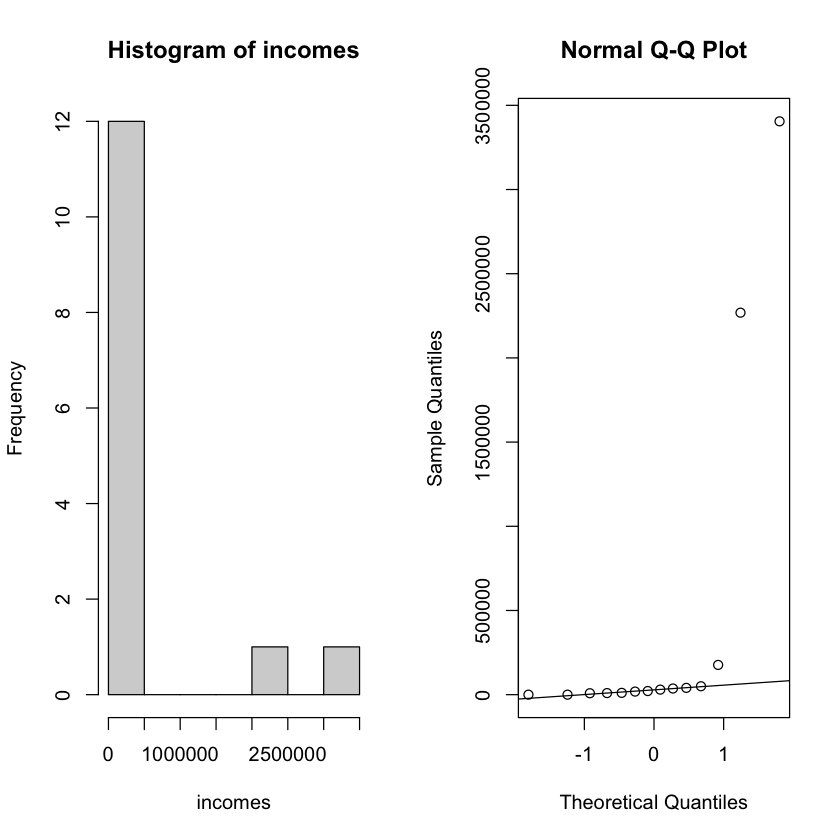

In [1]:
incomes <- c(8478, 21564, 36562, 176602, 9395, 18320,30000, 50000, 2, 40298, 39, 10780, 2268583, 3404930)
par(mfrow=c(1,2))
hist(incomes)##data skwewed
qqnorm(incomes)
qqline(incomes)

In [2]:
sort(incomes)
##how many incomes are larger and smaller than 30000

[1]       2      39    8478    9395   10780   18320   21564   30000   36562
[10]   40298   50000  176602 2268583 3404930

In [3]:
b <- sum(incomes > 50000)
b

n <- sum(incomes != 50000)
n

[1] 3

[1] 13

In [4]:
##N = 13 and  b = 3
binom.test(3, n = 13, p = 0.5)##pvalue and CI for two sided.
pbinom(3,13,0.5)##This will get you the pvalues a one side with the alternative greater
sum(dbinom(3:13,13,0.5))##This will get you the pvalues a one side with the alternative smaller



	Exact binomial test

data:  3 and 13
number of successes = 3, number of trials = 13, p-value = 0.09229
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.05038107 0.53813154
sample estimates:
probability of success 
             0.2307692 


[1] 0.04614258

[1] 0.9887695

### Mann-Whitney U test

This test is the equivalent to the 2 independent sample t-test. The null hypothesis is that the median of the two samples is the same.

To perform this test you:

1. Sort each samples
2. assign ranks starting from the smaller value from both samples
3. if both samples have the same value the rank assigned will be its location plus 0.5
4. sum up the ranks for each one the two samples
5. Calculate the U statistics for each sample with the following equation. The U value is the smaller of the two numbers

![title](U_statistic.png)

Where R is the rank sum for each sample.


6. Find the critical value and compare it to the U statistics using the U table (the Mann-Whitney-Table-CriticalValues.pdf in this folder)

#example taken from http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric4.html

A new approach to prenatal care is proposed for pregnant women living in a rural community. The new program involves in-home visits during the course of pregnancy in addition to the usual or regularly scheduled visits. A pilot randomized trial with 15 pregnant women is designed to evaluate whether women who participate in the program deliver healthier babies than women receiving usual care. The outcome is the APGAR scoretext annotation indicator measured 5 minutes after birth. Recall that APGAR scores range from 0 to 10 with scores of 7 or higher considered normal (healthy), 4-6 low and 0-3 critically low. The data are shown below.


In [ ]:
Usual_Care = c(8,7,6,2,5,8,7,3)
New_Program = c(9,9,7,8,10,9,6)

n1 = 8
n2 = 7

R1 = 45.5
R2 = 74.5

#Looking at the U table the critical value for n1 = 7 and n2 = 8 at alpha 0.05 is 10

![title](Utest_Example_Ranks.png)


In [ ]:
U1 = (n1*n2)+(n1*(n1+1)/2)-R1
U2 = (n1*n2)+(n2*(n2+1)/2)-R2
U1
U2 

#The test statistic is U=9.5

#As 9.5 < than 10 then we reject the null hypothesis at 95

In [ ]:
##With R you can get a p-value - W is a little bit different as this function evaluates ties a little different

W = data.frame(Data= Usual_Care)
W$Treat = "Usual"

W2 = data.frame(Data = New_Program)
W2$Treat = "New"

W_F = rbind(W,W2)

wilcox.test(Data ~ Treat, data=W_F)

### Wilcoxon signed-rank test

This thest is the equivalent to the 2 dependent sample t-test. The null hypothesis is that the median of the two samples is the same.

To perform this test you:

1. Sort each samples
2. assign ranks starting from the smaller value from both samples
3. if both samples have the same value the rank assigned will be its location plus 0.5
4. sum up the ranks for each one the two samples
5. Calculate W+ and W- with wi = ni(ni+1)/2 (n is each one of the sample sizes) - and choose the smallest W
6. Get the W critical value from the W table (wilcox_signrank_table.pdf) and compare it with the W statistics

### Example (From Handbook of Biological Statistics - John H. McDonald):

Laureysens et al. (2004) measured metal content in the wood of 13 poplar clones growing in a polluted area, once in August and once in November. Concentrations of aluminum (in micrograms of Al per gram of wood) are shown below.

In [ ]:
Input = ("
 Clone          August  November
 Balsam_Spire    8.1    11.2
 Beaupre        10.0    16.3
 Hazendans      16.5    15.3
 Hoogvorst      13.6    15.6
 Raspalje        9.5    10.5
 Unal            8.3    15.5
 Columbia_River  18.3   12.7
 Fritzi_Pauley   13.3   11.1
 Trichobel        7.9   19.9
 Gaver            8.1   20.4
 Gibecq           8.9   14.2
 Primo           12.6   12.7
 Wolterson       13.4   36.8
")

Data = read.table(textConnection(Input),header=TRUE)
Data

wilcox.test(Data$August,
            Data$November,
            paired=TRUE)

In [ ]:
plot(Data$August, Data$November,
     pch = 16,
     xlab="August",
     ylab="November")

abline(0,1, col="blue", lwd=2)

### Kruskal Wallis test

This thest is the equivalent to an ANOVA test. where you have a dependent continuous variable and a independent ordinal or discrete variable

To perform this test you:

1. Sort each samples
2. assign ranks starting from the smaller value from both samples
3. if samples have the same value the rank assigned will be its location plus 0.5
4. sum up the ranks for each one the samples
5. Calculate the H statistics as below, where g is each one of the groups from the independent variable.

![title](H_Statistics.png)


Example from: http://courses.atlas.illinois.edu/spring2016/STAT/STAT200/RProgramming/NonParametricStats.html

16 students were randomly assigned 3 different Final exams, were all 3 versions of the exam equally difficult?

In [ ]:
final <- c(10,60,70,80,100, 50,70,81,85,95, 20,75,86,90,98,99)
group <- factor(c(rep("A",5), rep("B",5), rep("C",6)), levels=c("A","B","C"))
# Check...
# Group A's scores
final[group=="A"]

##R is the sum of the ranks for each group
R <- tapply(rank(final), group, sum)
R

In [ ]:
boxplot(final~group,main="3 Different Test Scores",
   xlab="Groups", ylab="Scores")

In [ ]:
N <- length(final) # total number of scores
n <- table(group) # number of observations in each group
ExpR <- n*(N+1)/2 # expected rank sum for each group
ExpR
H <- 12/(N*(N+1))*sum( (R-ExpR)^2/n )
H ##H statistics

### Calculate the p-value using the chi2 statistic

In [ ]:
g = length(levels(group))

pchisq(H, g-1, lower.tail=FALSE) #Conclusion: The p-value is greater than 5%, so we do not reject the null.

In [ ]:
kruskal.test(final ~ group)